# 시간대별 서울 유동인구 분석 프로젝트
#### 데이터 선정하기

1. 인구데이터 : 서울 생활인구(내국인)2019년12월  
   ./dong_location.csv

2. 행정동코드 데이터 : 행정구역 코드 정보  
   ./dong_code.csv

> ## 행정동의 시간대별 평균인구 분석하기

하위 목표 1 : 행정동의 시간대별 평균인구 그래프 그려 분석하기

하위 목표 2 : 행정동의 주중/주말 시간대별 평균인구 그래프 그리고 분석하기

하위 목표 3 : 행정동의 남/녀 시간대별 평균인구 분석

하위 목표 4 : 특정 행정동과 익숙한 행정동의 시간대별 평균인구 비교 분석하기

# 프로그램으로 구현하기
### 인구 데이터 파일을 릭고 행정동명과 행정동코드 연결하기


 >### 인구데이터 파일 읽기(seoul_dong_people_201912.csv)
 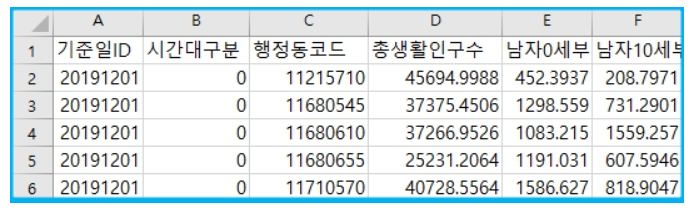

In [115]:
import matplotlib.pyplot as plt
import csv
plt.rc('font', family='AppleGothic')

 -  인구 데이터 읽어오기

In [116]:
# 또는 'eur-kr', 'cp949'
f = open('./seoul_dong_people_201912.csv', encoding='utf8')
data = csv.reader(f)
next(data)
data = list(data) # 읽어들인 파일을 2차원 리스트로 변환
print('data 건수 : ', len(data))
print('data[0] :', data[1])

data 건수 :  315456
data[0] : ['20191201', '0', '11680545', '37375.4506', '1298.5585', '731.2901', '889.5126', '895.5983', '1397.2099', '1609.7025', '1825.4062', '1741.6219', '1829.6326', '1370.2235', '1124.6595', '878.5269', '695.3232', '1717.7044', '1435.3327', '787.0444', '1130.2773', '1215.9905', '1628.3736', '1503.9461', '1752.1118', '1591.0488', '1555.4675', '1033.6247', '1094.5083', '988.0638', '944.5295', '2710.1619']


> ### 행정동 코드 데이터 파일 읽기(dong_code.csv)
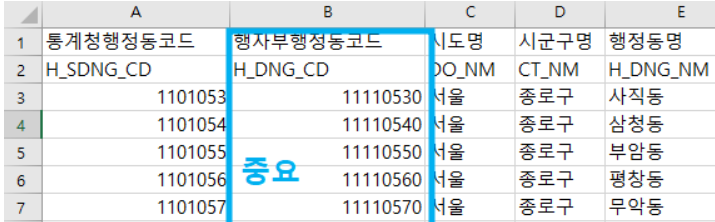

In [117]:
# 행정동코드 데이터 파일 읽기
f2 = open('./dong_code.csv', encoding='cp949')
code_data = csv.reader(f2)

next(code_data)
next(code_data)

code_data = list(code_data)
len(code_data)

424

> ### 데이터타입 미리 변환하기

#### 인구수를 연산하디 위해거 데이터타입을 미리 숫자형으로 변환하기

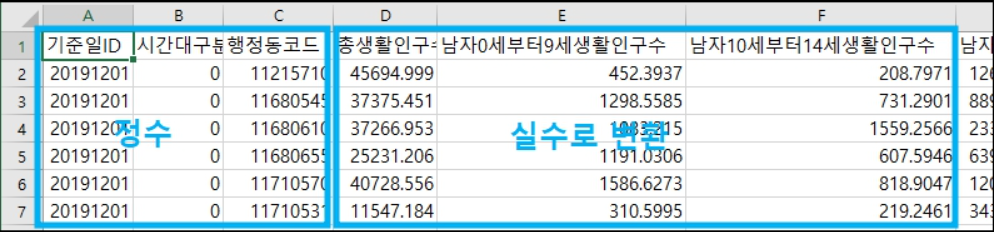

In [118]:
# 인구데이터 숫자형으로 변환하기
for row in data :
    for i in range(1, 32):
        if i <= 2: # 인덱스가 2이하인 경우(시간대구분, 행정동코드 등)
            row[i] = int(row[i]) # 정수형으로 변환
        else : # 인덱스다 2초과인 경우(총생활인구수부터)
            row[i] = float(row[i]) # 실수형으로 변환
            
print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707]


In [119]:
# 행정동코드 데이터 - 프로젝트에서 사용할 예정인 행자부 행정동코드만 숫자로 변경
for row in code_data :
    row[1] = int(row[1])
print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


> #### 사용자에게 행정동명을 콘솔 형태로 입력 받고, 그에 맞는 행정동코드를 찾기
 
1. 사용자에게서 행정동명을 입력받아 변수(dong_name)에 저장
2. 행정동코드 데이터(code_data) 루핑
   - 행정동코드 데이터의 마지막 열인 행정동명(열 인덱스[-1])이 사용자가 입력한  
     행정동명(dong_name)과 같다면 행정동코드를 변수(dong_code)에 저장하기

In [120]:
# 행정동명과 행정동코드 연결하기
dong_name = input('시간별 인구 분석을 원하는 행정동을 입력하세요 -->')
dong_code = ''
for row in code_data :
    if row[-1] == dong_name:
        dong_code = row[1]
        
print('조회한 동의 코드는 : ', dong_name, '-->', dong_code, '입니다.')

시간별 인구 분석을 원하는 행정동을 입력하세요 -->압구정동
조회한 동의 코드는 :  압구정동 --> 11680545 입니다.


> ### 하위목표 1-시간별 인구 분석

> ### 알고리즘 작성

1. 시간별 평균인구 저장 리스트(population) 생성, 길이 24, 초기값 0
2. 인구 데이터 루핑  
  2.1 사용자가 입력 동코드(dong_code)와 인구데이터(data)의 동코드(row[2])가 같으면  
  2.1.1 해당 행의 시간대(row[1])와 총생활인구수(row[3])를 각각 변수 (time, p)에 저장하기  
  2.1.2 과정 2.1.1에서 저장한 시간대(time)가 population의 인덱스이므로 population[time]에 총생활인구수(p) 더하기  
3. 반복이 끝나면 population 리스트의 모든 값을 31로 나눈 후 population에 다시 저장하기
4. 완성된 population 리스트로 시간대별 평균인구 그래프 그리기

 > ### 코드 작성하기
 
- 31일치 시간별 인구수 누적 및 평균 구하기

In [121]:
print('data 건수 : ', len(data))

data 건수 :  315456


In [122]:
import csv
# 시간대별 평균 인구 저장용 리스트 컴프리헨션으로 생성하기
# 리스투에 숫자 0~23 초기화
population = [0 for i in range(24)]
# 반복작업
for row in data :
    if row[2] == dong_code:
        time, p = row[1], row[3] # 시간대, 총생활인구수
        population[time] += p # 해당 시간대에 누적

# 31일로 나눠서 평균 인구수 구하기
population = [p/31 for p in population]
population

[37098.63627419355,
 35891.815432258074,
 34893.24598064515,
 34239.072461290314,
 33920.37237419355,
 34494.50137741935,
 35905.50056774193,
 38626.92853870967,
 44979.65409354841,
 51633.661274193546,
 55554.117774193546,
 58916.34707096774,
 61492.38014516128,
 63030.782135483874,
 63344.8899387097,
 63202.48352903225,
 62733.28691935485,
 62500.427067741955,
 60220.48321290324,
 55475.18018064517,
 51779.897145161296,
 48206.21305483869,
 43570.433745161296,
 39358.195206451615]

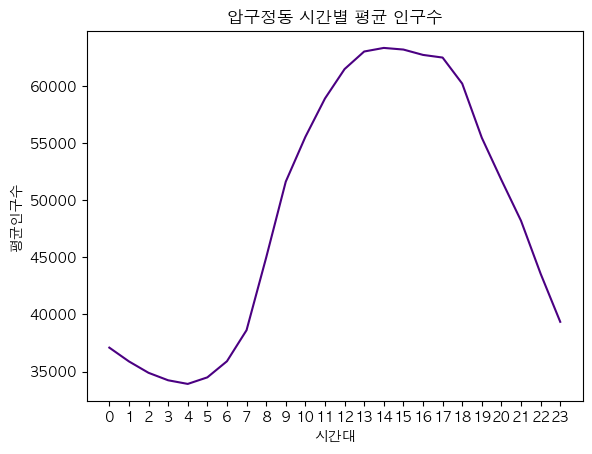

In [123]:
plt.title(dong_name + ' 시간별 평균 인구수') # 그래프 제목
plt.plot(range(24), population, color='indigo') # 그래프 그리기
plt.xticks(range(24), range(24)) # x축눈금
plt.xlabel('시간대') # x축 이름
plt.ylabel('평균인구수') # y축 이름
plt.show()

 > ## 하위목표 2 - 주중,주말 시간별 인구 분석
 요일을 알려주는 datetime 라이브러리

In [124]:
# 0 부터 6까지 각각 월화수목금토일을 의미함.

import datetime

datetime.date(2022, 10, 24).weekday() # type : int

0

> ## 알고리즘 작성

1. 주중 시간별 생활 인구를 저장할 리스트(weekday)와 주말 시간별 생활인구를 저장할 리스트(weekend) 생성
2. 인구데이터(data)의 첫 행ㅇ부터 마지막 핼까지 돌며 반복하기  
  2.1 사용잦각 입력한 동코드(dong_code)와 인구데이터(data)의 동코드(row[2])가 같다면  
  2.1.1 해당 행의 시간대(time)와 총생활인구수(p), 기준일ID의 연도(year), 월(mon), 일(day)을 각각 변수에 저장  
  2.1.2 과정 2.1.1에서 저장한 연도(year), 월(mon), 일(day)을 datetime.date().weekday()에 넣어 주중/주말 구분  
  2.1.3 주중이면 주중 리스트(weekday)에 총생활인구수(p), 주말이면 주말리스트(weekend)에 총생활인구수(p) 더하기  
3. 주중인구과 주말인구의 평균을 구하기 위해 2019년 12월의 주중일수와 주말일수를 알아야 함(3~4)
4. 2019년 12월의 주중 일수(weekday_cnt)와 주말 일수(weekend_cnt)를 저장할 변수 생성하고 0으로 초기화
5. 2019년 12월의 일수만큼 반복하기
  5.1 datetime.date(2019, 12, i)가 주중이면 주중 일수(weekday_cnt)에 +1, 주말이면 주말 일수(weekend_cnt)에 +1
6. 주중 리스트(weekday)의 각 요소를 주중 일수(weekday_cnt)로, 주말 리스트(weekend)의 각 요소를 주말 일수(weekent_cnt)로  
   나누어 주중/주말 평균인구 구하기
7. 완성된 weekday와 weekend 리스트로 주중/주말 시간대별 평균인구 그래프 그리기

 > ### 코드 작성하기
 
- 주중 주말로 나눠서 인구 합산

In [125]:
weekday = [0 for i in range(24)] # 주중 시간별 인구 저장
weekend = [0 for i in range(24)] # 주말 시간별 인구 저장

#datetime.date(year, mon, day).weekday()
for row in data :
    if row[2] == dong_code :
        time, p = row[1], row[3]
        year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
        num = datetime.date(year, mon, day).weekday()
        if num < 5 :
            weekday[time] += p
        else : 
            weekend[time] += p
print(weekday)

[799657.9338, 776259.6568000002, 758972.9126999999, 748637.2045999999, 745785.4171999999, 761194.4557000002, 797782.4973999999, 869449.5044999999, 1043078.0830000002, 1203560.4676, 1290852.3991, 1362847.0192000002, 1415153.4316, 1448836.6121999999, 1457004.6797999998, 1461096.0907, 1457525.3236999998, 1466096.6436000003, 1419467.869, 1292968.7373000002, 1199783.8366, 1111184.9171, 990008.3415999998, 886427.2212999999]


 - 주중, 주말 인구 비교하기
     - 다음 셀을 두번 이상 실행하면 수치가 변경되기 때문에 위의 셀을 실행하고 재실행할 것!

In [126]:
# 2019년 12월의 주중/주말 일수 구하기
# 구해진 주중/주말 일수로 시간별 인구수 나누기
weekday_cnt, weekend_cnt = 0, 0
for i in range(1, 32) :
    if datetime.date(2019, 12, i).weekday() < 5 :
        weekday_cnt += 1
    else : 
        weekend_cnt += 1
        
print('2019년 12월의 주중 일수 :', weekday_cnt)
print('2019년 12월의 주말 일수 :', weekend_cnt)

# 리스트 컴프리헨션으로 리스트에 들어있는 주중 시간별 인구를 일수로 나누기
weekday = [w / weekday_cnt for w in weekday]

# 리스트 컴프리헨션으로 리스트에 들어있는 주말 시간별 인구를 일수로 나누기
weekend = [w / weekend_cnt for w in weekend]

print('주중 인구 : ', weekday)
print('주말 인구 : ', weekend)

2019년 12월의 주중 일수 : 22
2019년 12월의 주말 일수 : 9
주중 인구 :  [36348.0879, 35284.529854545464, 34498.768759090904, 34028.96384545454, 33899.33714545454, 34599.74798636365, 36262.84079090908, 39520.43202272727, 47412.64013636365, 54707.293981818184, 58675.10905, 61947.59178181819, 64325.155981818185, 65856.20964545454, 66227.48544545454, 66413.45866818182, 66251.15107727272, 66640.75652727274, 64521.26677272727, 58771.3062409091, 54535.62893636364, 50508.405322727274, 45000.37916363635, 40292.146422727266]
주말 인구 :  [38933.31007777777, 37376.29128888888, 35857.52363333333, 34752.6713, 33971.79182222223, 34237.23188888889, 35032.00224444444, 36442.80891111111, 39032.354877777776, 44120.33687777778, 47925.02798888888, 51506.637777777774, 54567.81698888889, 56124.18155555555, 56298.54536666667, 55353.43318888889, 54134.06342222222, 52379.621722222226, 49707.45673333333, 47417.98314444444, 45043.66387777778, 42578.63195555555, 40075.01161111111, 37075.203344444446]


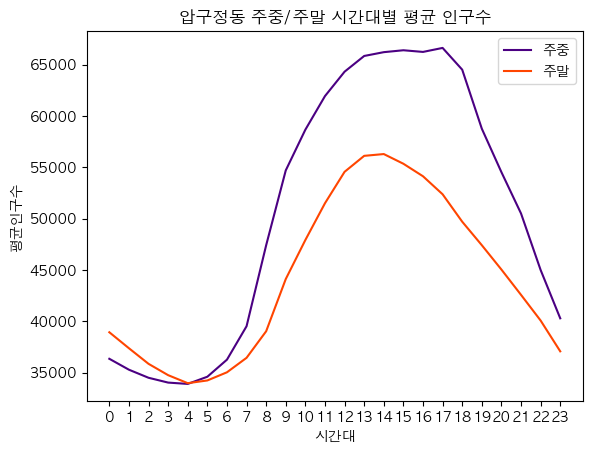

In [127]:
plt.title(dong_name + ' 주중/주말 시간대별 평균 인구수') # 그래프 제목
plt.plot(range(24), weekday, color='indigo', label='주중') # 그래프 그리기
plt.plot(range(24), weekend, color='orangered', label='주말') # 그래프 그리기
plt.legend()
plt.xlabel('시간대') # x축 이름
plt.ylabel('평균인구수') # y축 이름
plt.xticks(range(24), range(24))
plt.show()

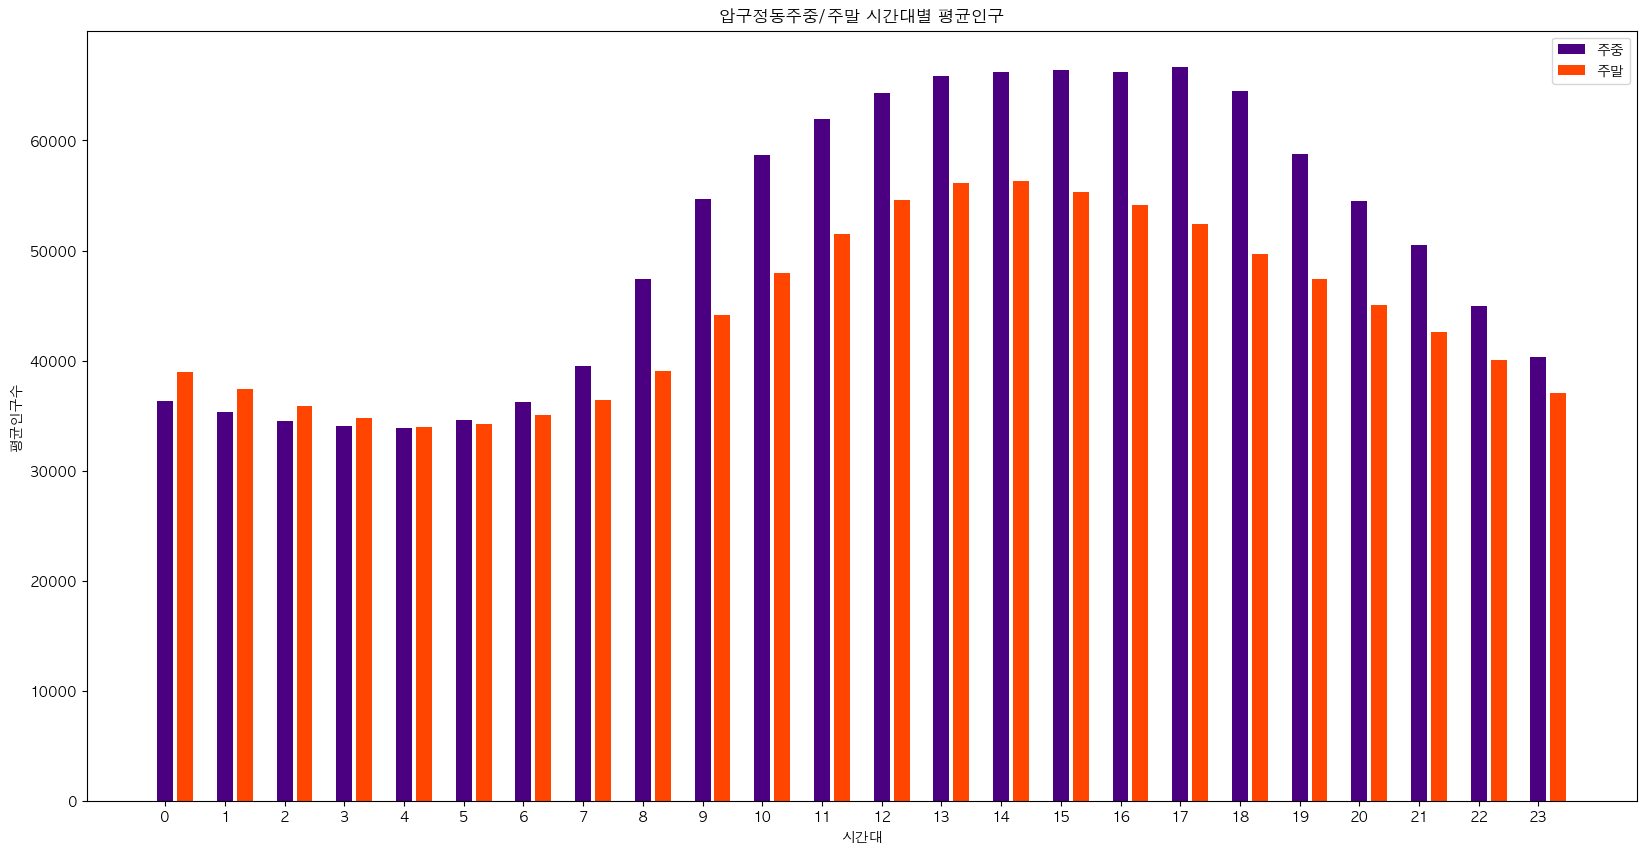

In [128]:
plt.figure(figsize=(20,10))
plt.title(dong_name + '주중/주말 시간대별 평균인구')
plt.bar(range(0, 72, 3), weekday, color='indigo', label='주중')
plt.bar(range(1, 73, 3), weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(0, 72, 3), range(24))
plt.show()

 > 하위 목표 2의 결과 분석
 
 - 압구정동은 주말보다는 주중인구가 더 많다.
 - 주말에 압구정에 간다면 그리 걱정하지 않아도 된다.

## 하위 목표3 - 남,녀 시간별 평균 인구수 분석

> ## 알고리즘 작성

1. 남성 시간대별 생활인구를 저장랑 리스트(male)와 여성 시간대별 생활인구를 저장할 리스트(female) 생성
2. 해당 동의 인구데이터(data)의 첫 행부터 마지막 행 까지 돌며 반복하기  
  2.1 사용자가 입력한 행정동의 행정동코드(dong_code)와 인구데이터(data)의 행정동코드(row[2])가 같다면  
  2.1.1 해당 행의 시간대(열 인덱스[1])를 변수(time)에 저장하기  
  2.1.2 열 인덱스[4]부터 [17]까지의 합을 male[time]에 더하기  
  2.1.3 열 인덱스[18]부터 [31]까지의 합을 female[time]에 더하기  
3. 반복이 끝나면 남성 생활인구 리스트(male)와 여성 생활인구 리스트(female)를 각각 31로 나누어 시간대별 평균인구 구하기
4. 완성된 male과 female 리스트로 시간대별 평균인구 그래프 그리기

 > ### 코드 작성하기

In [129]:
# 남성 시간별 인구
male = [0 for i in range(24)]

# 여성 시간별 인구
female = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code :
        time = row[1]
        # 남성 인구 총합 구하기 (csv의 4 ~ 17 컬럼)
        male[time] += sum(row[4:18])
        # 여성 인구 총합 구하기 (csv의 18 ~ 31 컬럼)
        female[time] += sum(row[18:32])
        
male = [m / 31 for m in male]
female = [f / 31 for f in female]
print(male)

[17714.90561935484, 17053.468222580643, 16491.98523870968, 16091.649409677422, 15817.622287096774, 16162.89746129032, 16995.742745161286, 18317.99659354838, 20677.179261290323, 22865.48414838709, 24203.428932258063, 25397.284032258063, 26396.00189032258, 27016.90633548387, 27317.46333225806, 27456.531754838714, 27523.587838709678, 27940.01370645161, 27369.059048387095, 25582.964003225807, 24221.808090322575, 22761.341629032257, 20808.063506451617, 18945.2067483871]


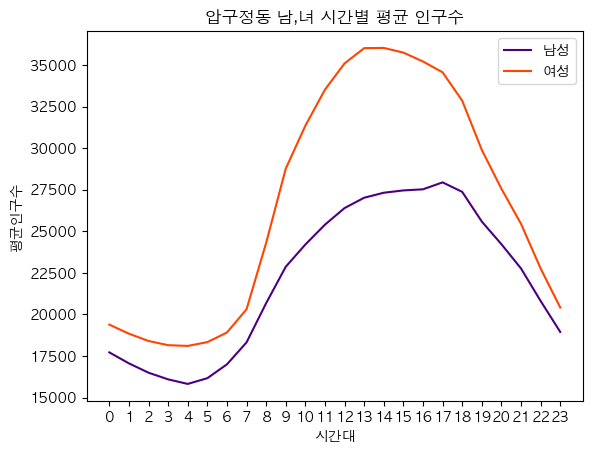

In [130]:
plt.title(dong_name + ' 남,녀 시간별 평균 인구수') # 그래프 제목
plt.plot(range(24), male, color='indigo', label='남성') # 그래프 그리기
plt.plot(range(24), female, color='orangered', label='여성') # 그래프 그리기
plt.legend()
plt.xlabel('시간대') # x축 이름
plt.ylabel('평균인구수') # y축 이름
plt.xticks(range(24), range(24))
plt.show()

## 하위 목표3 - 특정 행정동과 익숙한 행정동의 시간대별 평균인구 비교 분석하기

> ## 알고리즘 작성

 - 이전 하위 목표와 동일

#### 코드 작성하기

In [140]:
# 행정동 입력
dong_name = input('시간별 인구 분석을 원하는 행정동을 입력하세요 --> ')
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]
        
# 비교할 행정동
dong_name2 = input('비교할 행정동을 입력하세요 --> ')
for row in code_data:
    if row[-1] == dong_name2:
        dong_code2 = row[1]

시간별 인구 분석을 원하는 행정동을 입력하세요 --> 압구정동
비교할 행정동을 입력하세요 --> 역삼2동


In [141]:
population = [0 for i in range(24)]
population2 = [0 for i in range(24)]

for row in data :
    # 기존 행정동인 경우
    if row[2] == dong_code:
        time, p = row[1], row[3]
        population[time] += p
        
    # 비교할 지역의 행정동인 경우
    elif row[2] == dong_code2:
        time, p = row[1], row[3]
        population2[time] += p
        
population = [p / 31 for p in population]
population2 = [p / 31 for p in population2]

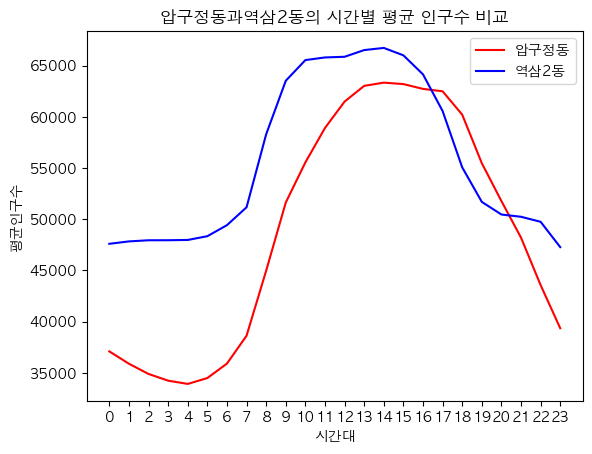

In [142]:
plt.title(dong_name + '과' + dong_name2 +'의 시간별 평균 인구수 비교') # 그래프 제목
plt.plot(range(24), population, color='r', label = dong_name) # 그래프 그리기
plt.plot(range(24), population2, color='b', label = dong_name2) # 그래프 그리기
plt.legend()
plt.xticks(range(24), range(24)) # x축눈금
plt.xlabel('시간대') # x축 이름
plt.ylabel('평균인구수') # y축 이름
plt.show()

하위 목표4의 결과분석

- 인구이동이 적은 새벽 인구가 해당 동에 거주하는 인구라 가정하면, 역삼 2동이 압구정동보다 거주인구가 많다.
- 인구 이동은 역삼 2동 보다 압구정동이 더 많다.
- 대부분의 시간에는 역삼2동의 인구가 더 많지만 17~20시 사이에는 압구정동이 더 많다.
- 17~20시에는 역삼2동으로, 그 외 시간대에는 압구정동으로 가는 것이 사람이 덜 붐빈다.